In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [32]:
raw_df1 = pd.read_csv('../Data/comment1.csv')
raw_df2 = pd.read_csv('../Data/comment2.csv')
raw_df3 = pd.read_csv('../Data/comment4.csv')
raw_df4 = pd.read_csv('../Data/comment4.csv')
raw_df5 = pd.read_csv('../Data/comment5.csv')
raw_df6 = pd.read_csv('../Data/comment6.csv')
raw_df7 = pd.read_csv('../Data/comment7.csv')

In [33]:
result = pd.concat([raw_df1,raw_df2,raw_df3,raw_df4,raw_df5,raw_df6,raw_df7], ignore_index= True)

## Phân tích tỉ lệ giới tính người comment

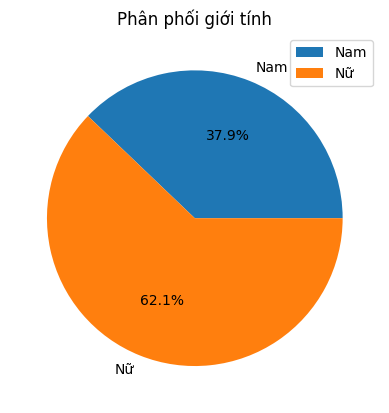

In [34]:
a = result
a = a.dropna(subset=['Thông tin cơ bản']).reset_index(drop=True)
male_count = 0
female_count = 0
for i in range(len(a)):
    temp = a.iloc[i]
    string = temp['Thông tin cơ bản']
    if 'Nam' in string:
        male_count += 1
    elif 'Nữ' in string:
        female_count += 1


values = [male_count, female_count]
labels = ['Nam', 'Nữ']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Phân phối giới tính')
plt.legend()
plt.show()

## Phân tích quê quán người comment

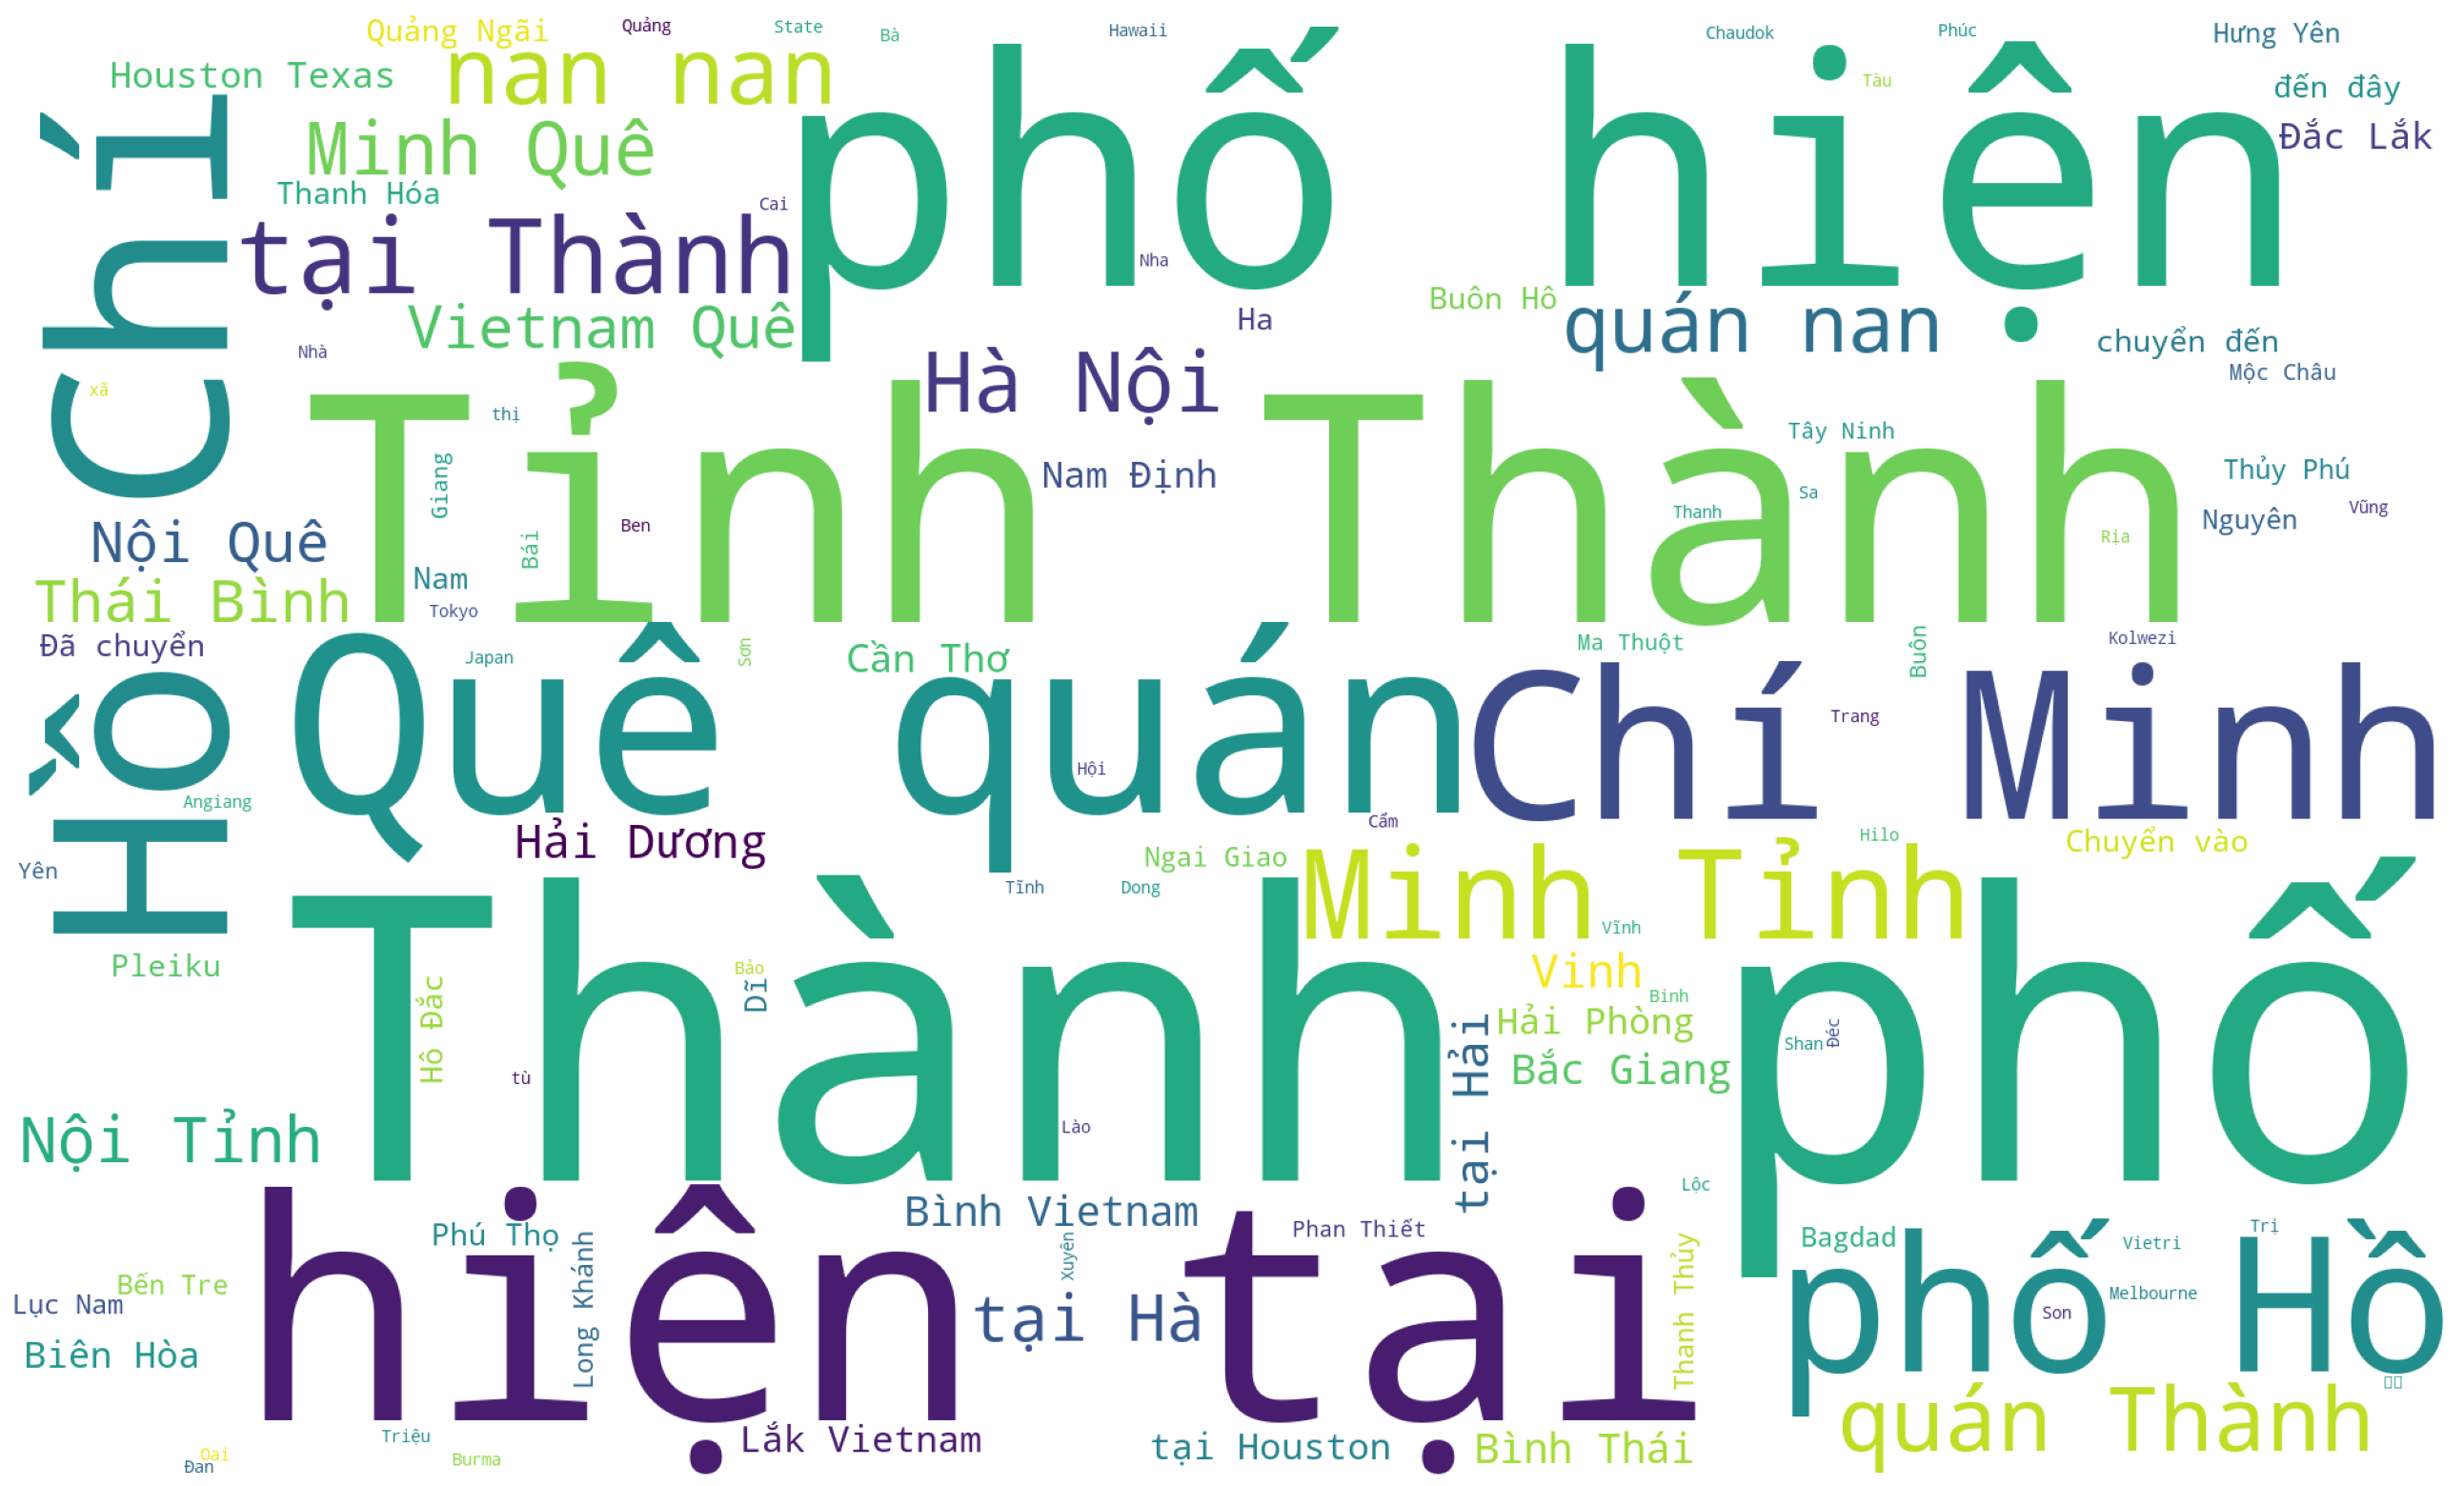

In [35]:
text = ''
b = result
b.dropna(subset=['Nơi từng sống']).reset_index(drop=True)
for i in range(len(b)):
    temp = b.iloc[i]
    string = str(temp['Nơi từng sống'])
    text= text+string+'\n'
    
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

text_cleaned = text.replace('#', '').replace(':', '').replace('.', '').replace('-', '').replace(',','').replace('!','').replace('>','').replace('?','').replace(')','')

# Sử dụng word_tokenize để tách từ
words = word_tokenize(text_cleaned)

# Tính tần suất xuất hiện của từ
word_freq = FreqDist(words)
sorted_word_freq = word_freq.most_common()
# In tần suất xuất hiện của từng từ
for word, freq in sorted_word_freq:
    print(f"{word}: {freq} lần")


phố: 272 lần
Tỉnh/Thành: 161 lần
hiện: 161 lần
tại: 161 lần
Quê: 120 lần
quán: 120 lần
Hồ: 115 lần
Chí: 115 lần
Minh: 115 lần
Thành: 111 lần
nan: 79 lần
Hà: 38 lần
Nội: 35 lần
Vietnam: 28 lần
Thái: 19 lần
Hải: 16 lần
Bình: 16 lần
Nam: 11 lần
Vinh: 10 lần
Giang: 10 lần
Dương: 10 lần
Thanh: 8 lần
Bắc: 8 lần
Cần: 7 lần
Thơ: 7 lần
An: 6 lần
Biên: 6 lần
Hòa: 6 lần
Buôn: 6 lần
Đắc: 6 lần
Lắk: 6 lần
Định: 6 lần
Houston: 6 lần
Texas: 6 lần
Phòng: 6 lần
Quảng: 5 lần
Yên: 5 lần
Hóa: 4 lần
Dĩ: 4 lần
Chuyển: 4 lần
vào: 4 lần
Đã: 4 lần
chuyển: 4 lần
đến: 4 lần
đây: 4 lần
Ngãi: 4 lần
Hô: 4 lần
Phú: 4 lần
Thọ: 4 lần
Pleiku: 4 lần
Lục: 3 lần
Bến: 3 lần
Tre: 3 lần
Hưng: 3 lần
Thủy: 3 lần
Nguyên: 3 lần
Ngai: 3 lần
Giao: 3 lần
Long: 3 lần
Khánh: 3 lần
Bagdad: 3 lần
2021: 2 lần
Ma: 2 lần
Thuột: 2 lần
Bái: 2 lần
Tây: 2 lần
Ninh: 2 lần
Phan: 2 lần
Thiết: 2 lần
HaNam: 2 lần
Mộc: 2 lần
Châu: 2 lần
Triệu: 1 lần
Sơn: 1 lần
Sa: 1 lần
Đéc: 1 lần
Đan: 1 lần
Hội: 1 lần
2012: 1 lần
Lào: 1 lần
Cai: 1 lần
Bảo: 1 lần
L

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Phân tích mối quan hệ người comment

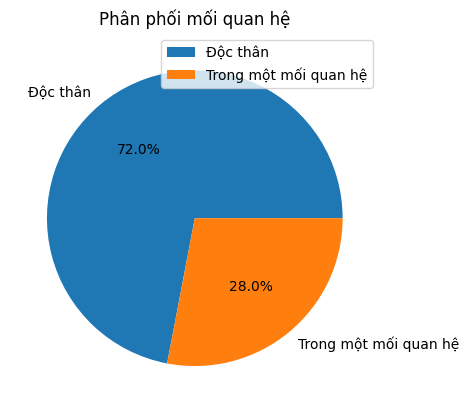

In [37]:
a = result
a = a.dropna(subset=['Mối quan hệ']).reset_index(drop=True)
cnt_single = 0
cnt_married_or_dating = 0
for i in range(len(a)):
    temp = a.iloc[i]
    string = temp['Mối quan hệ']
    if 'Độc thân' in string:
        cnt_single += 1
    elif 'Kết hôn' in string or 'Hẹn hò' in string:
        cnt_married_or_dating += 1


values = [cnt_single, cnt_married_or_dating]
labels = ['Độc thân', 'Trong một mối quan hệ']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Phân phối mối quan hệ')
plt.legend()
plt.show()